In [19]:
#|default_exp app

In [21]:
#|export
from fastai.vision.all import *
import gradio as gr
def is_cat(x): return x[0].isupper()

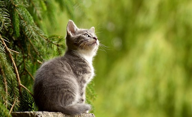

In [11]:
im = PILImage.create('./sample-images/cat.jpeg')
im.thumbnail((192,192))
im

In [22]:
#|export
learn = load_learner('model.pkl')

In [23]:
#|export
categories=('Dog','Cat')
def classify_image(img):
    pred,idx,prob=learn.predict(img)
    return dict(zip(categories,map(float,prob)))

In [13]:
learn.predict(im)

('True', TensorBase(1), TensorBase([2.5216e-10, 1.0000e+00]))

In [5]:
classify_image(im)

{'Dog': 2.5216323473742364e-10, 'Cat': 1.0}

In [9]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples=['./sample-images/blur.jpeg','./sample-images/cat.jpeg','./sample-images/cat1.jpeg','./sample-images/catdog.jpeg','./sample-images/dog.jpeg','./sample-images/cat2.jpeg','./sample-images/dog2.jpeg','./sample-images/download.jpeg','./sample-images/mix.jpeg']
interface = gr.Interface(fn=classify_image,inputs=image,outputs=label,examples=examples)
interface.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


In [24]:
 from nbdev.export import nb_export

In [25]:
nb_export('app.ipynb')